In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score


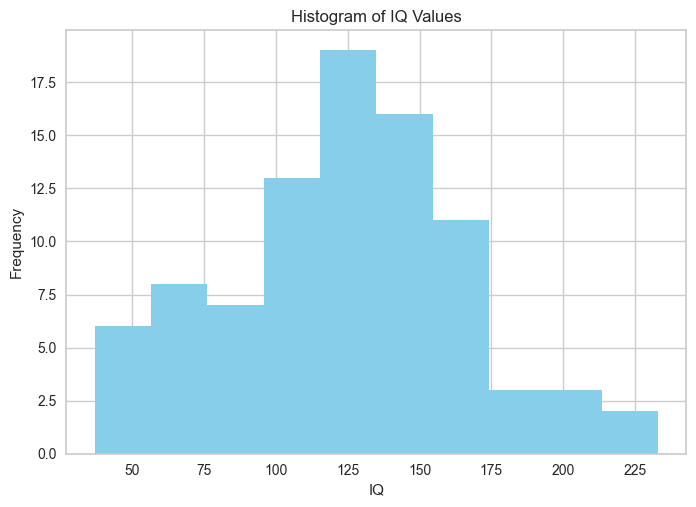

In [28]:
# Create a histogram of IQ values
def create_histogram(data):
    plt.hist(data['iq'], bins=10, color='SkyBlue')
    plt.xlabel('IQ')
    plt.ylabel('Frequency')
    plt.title('Histogram of IQ Values')
    plt.show()

create_histogram(data)

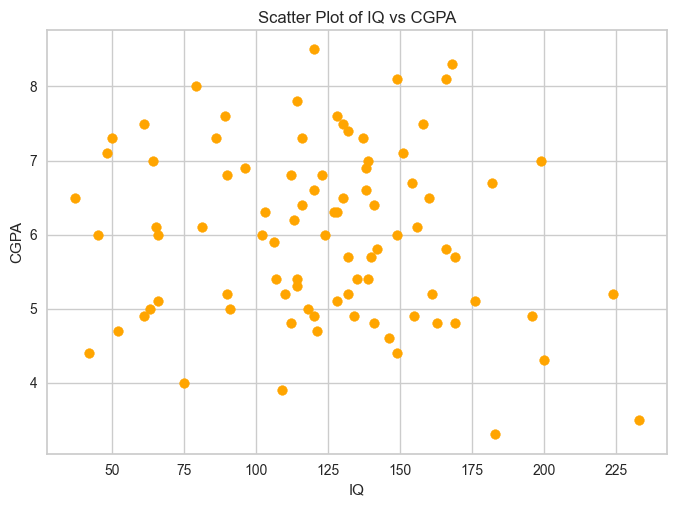

In [11]:
# Create a scatter plot of CGPA vs IQ
def create_scatter_plot(data):
    plt.scatter(data['iq'], data['cgpa'], color='orange')
    plt.xlabel('IQ')
    plt.ylabel('CGPA')
    plt.title('Scatter Plot of IQ vs CGPA')
    plt.show()

create_scatter_plot(data)

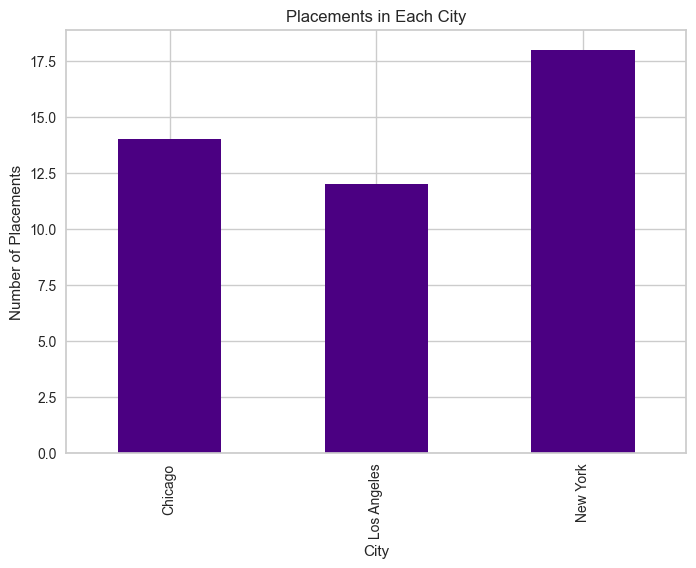

In [32]:
# Create a bar chart of placements in each city
def create_categorical_graph(data):
    city_counts = data['placement'].groupby(data['city']).sum()
    city_counts.plot(kind='bar', color='Indigo')
    plt.xlabel('City')
    plt.ylabel('Number of Placements')
    plt.title('Placements in Each City')
    plt.show()

create_categorical_graph(data)

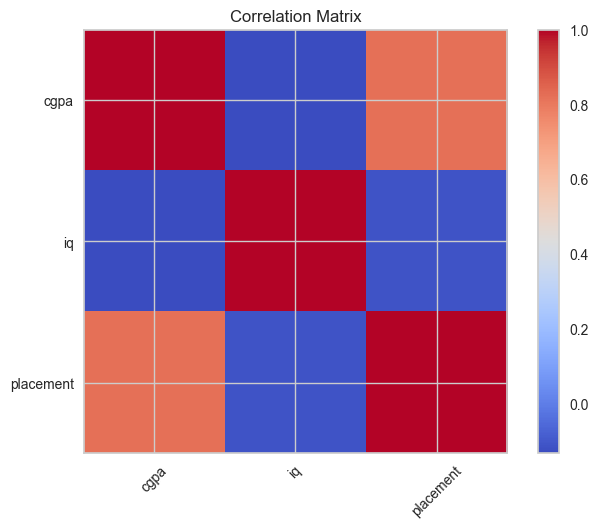

In [13]:
# Create a heatmap of the correlation matrix
def create_statistical_graph(data):
    numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
    corr = numeric_data.corr()
    plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title('Correlation Matrix')
    plt.show()

create_statistical_graph(data)

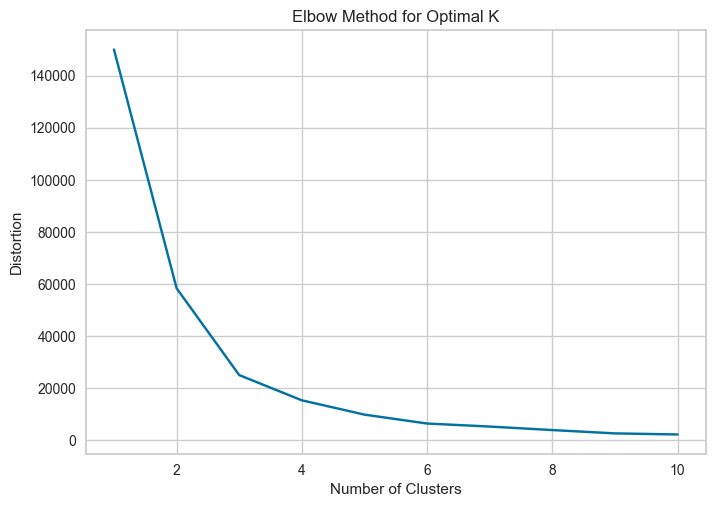

In [15]:
# Elbow plot for K-means clustering
def elbow_plot(data):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data[['iq', 'cgpa']])
        distortions.append(kmeans.inertia_)
    
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal K')
    plt.show()

elbow_plot(data)

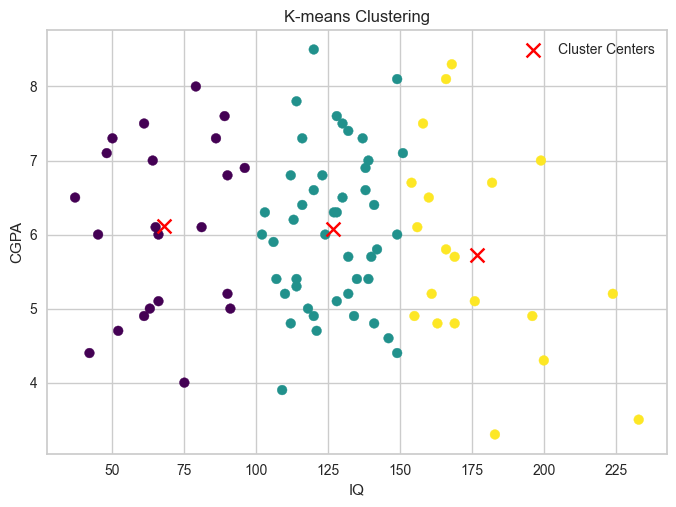

In [16]:
# Perform K-means clustering
def perform_clustering(data, k):
    kmeans = KMeans(n_clusters=k)
    data['cluster'] = kmeans.fit_predict(data[['iq', 'cgpa']])
    
    # Visualize the clusters
    plt.scatter(data['iq'], data['cgpa'], c=data['cluster'], cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='red', s=100, label='Cluster Centers')
    plt.xlabel('IQ')
    plt.ylabel('CGPA')
    plt.title('K-means Clustering')
    plt.legend()
    plt.show()

perform_clustering(data, 3)

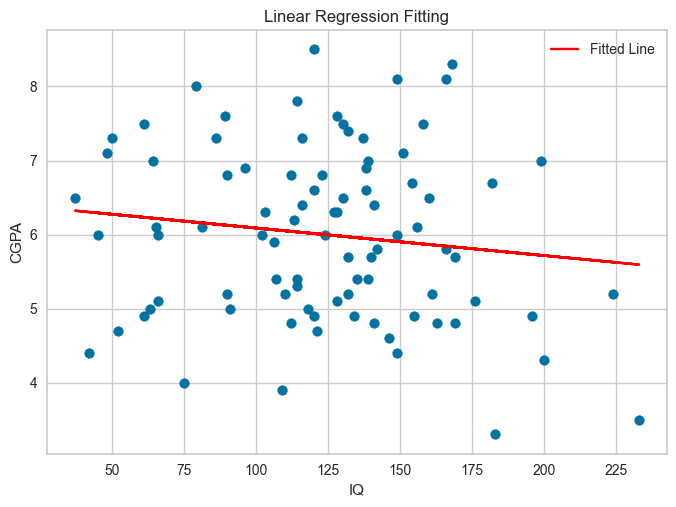

In [17]:
# Perform linear regression
def perform_fitting(data):
    x = data['iq'].values.reshape(-1, 1)
    y = data['cgpa'].values.reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(x, y)
    
    y_pred = model.predict(x)
    
    plt.scatter(x, y)
    plt.plot(x, y_pred, color='red', label='Fitted Line')
    plt.xlabel('IQ')
    plt.ylabel('CGPA')
    plt.title('Linear Regression Fitting')
    plt.legend()
    plt.show()

perform_fitting(data)

In [18]:
# Calculate silhouette score
silhouette_avg = silhouette_score(data[['iq', 'cgpa']], data['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5692352915037936
